# Modeling Housing Prices in Ames, Iowa
---
_Author: Hunter Henninger (SF)_ 

## Problem Statement

The goal of this project is to formulate a regression model based on the Ames Housing Dataset. Through a process of data cleaning, preprocessing, and model tuning,  this study aims to make accurate predictions of the price of a house at sale. Analysis of appropriate metrics will provide insight into the quality of the predictive model. In doing this, home owners and real estate investors gain a better understanding of the most significant factors affecting the prices at sale. This study will proveide clear recommendations and ways of boosting the value of their houses to achieve maximum selling prices.

## Executive Summary

This study will incorporate the Ames Housing Dataset sourced by Ames, Iowa's Accessor Office to create the model. The portion of this dataset that is cleaned, preprocessed, and modeled consists of 2051 houses in Ames, Iowa between the years 2006 and 2010. An analysis of 80 features for homes including both numerical and categorical data seeks to use these features to predict the selling price of each house. The accuracy of these predictions can be interpreted by home owners and real estate investors as a way to boost the price of a house at sale. 

The study begins with a data cleaning process to handle missing data and outliers. A cleaned dataset is then preprocessed and visualized using various plots to determine basic trends between each feature and sale prices. Once a list of "interesting" features is selected, a multiple linear regression is evaluated. After a series of model tuning steps including a regularization penalty, coefficents are pulled out for practical interpretation. This predictive model proves that there are realistic methods for improving the value of home in Ames, Iowa.

---
## Data Cleaning

---
### Objective
This notebook seeks to take an initial look at the train and test data sets. It aims to prepare datasets for future preprocessing and modeling by adjusting column names, handle outliers, and impute missing data.

---
#### External Library Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datapreprocessing import DataPreprocessing

### Load Data

In [13]:
# read in the training dataset
ames_csv = '../datasets/train.csv'
df_train = pd.read_csv(ames_csv)

# read in the testing dataset
ames_test_csv = '../datasets/test.csv'
df_test = pd.read_csv(ames_test_csv)

### View and Clean Data

In [14]:
# display first 5 rows of training data
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [15]:
df_train.shape

(2051, 81)

In [4]:
# clean column names for train and test
df_train.columns = [i.lower().replace(' ', '_') for i in df_train.columns]

df_test.columns = [i.lower().replace(' ', '_') for i in df_test.columns]

In [5]:
# examine distributions of each feature
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [6]:
df_train.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

As I consider an intuitively important feature like square feet, the max values are far from the means so I will look to identify outliers.

#### Handle Outliers

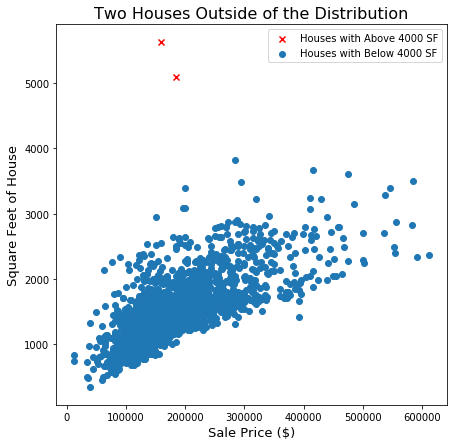

In [7]:
# show outliers in scatterplot

plt.figure(figsize = (7 , 7))
plt.scatter(df_train[df_train['gr_liv_area'] > 4000]['saleprice'] , 
            df_train[df_train['gr_liv_area'] > 4000]['gr_liv_area'] ,
            marker = 'x' , 
            color = 'r')
plt.scatter(df_train[df_train['gr_liv_area'] < 4000]['saleprice'] , 
            df_train[df_train['gr_liv_area'] < 4000]['gr_liv_area'])
plt.xlabel('Sale Price ($)' , fontsize = 13)
plt.ylabel('Square Feet of House' , fontsize = 13)
plt.legend(['Houses with Above 4000 SF' , 'Houses with Below 4000 SF'])
plt.title('Two Houses Outside of the Distribution' , fontsize = 16);

In [8]:
# remove the two outliers

df_train = df_train[df_train['gr_liv_area'] < 4000]

#### View Missing Data

In [9]:
# using DataPreprocessing class in .py file check for null data

dp = DataPreprocessing()
dp.get_missing_values(df_train)

,features,num_missing_values
0,lot_frontage,330
1,alley,1909
2,mas_vnr_type,22
3,mas_vnr_area,22
4,bsmt_qual,55
5,bsmt_cond,55
6,bsmt_exposure,58
7,bsmtfin_type_1,55
8,bsmtfin_sf_1,1
9,bsmtfin_type_2,56


#### Handle Missing Data

In [10]:
# fill missing data with a random choice from each numeric feature in train and test data

dp.impute_missing_values(df_train, 'random')

dp.impute_missing_values(df_test, 'random')

#### Save cleaned datasets

In [11]:
df_train.to_csv('../datasets/clean_train.csv' , index = False) 
df_test.to_csv('../datasets/clean_test.csv' , index = False)